# LlamaCloud Page Figure Retrieval
This notebook shows an example of retrieving images embedded within a sample PDF document.
More docs on using this feature can be found on the [LlamaCloud docs page](https://docs.cloud.llamaindex.ai/llamacloud/retrieval/images).

In [ ]:
%pip install llama-index llama-index-llms-openai llama-cloud llama-index-indices-managed-llama-cloud

/Users/sourabhdesai/workspace/llama_index/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


### Create an Index and upload the figures PDF to it

In [ ]:
# Get the LlamaCloud API Key
import os

api_key = os.environ["LLAMA_CLOUD_API_KEY"]
org_id = os.environ.get("LLAMA_CLOUD_ORGANIZATION_ID")
openai_api_key = os.environ["OPENAI_API_KEY"]

In [ ]:
# print cwd to see where to load PDF file from
import os

print(os.getcwd())

/Users/sourabhdesai/workspace/llama_index/docs/docs/examples/llama_cloud


In [ ]:
from llama_cloud.types import LlamaParseParameters
from llama_index.indices.managed.llama_cloud import LlamaCloudIndex

embedding_config = {
    "type": "OPENAI_EMBEDDING",
    "component": {
        "api_key": openai_api_key,
        "model_name": "text-embedding-ada-002",  # You can choose any OpenAI Embedding model
    },
}

index = LlamaCloudIndex.create_index(
    name="my_index",
    organization_id=org_id,
    api_key=api_key,
    embedding_config=embedding_config,
    llama_parse_parameters=LlamaParseParameters(
        take_screenshot=True,
        extract_layout=True,
    ),
)


image_figure_slides_path = "../data/figures/image_figure_slides.pdf"
index.upload_file(
    image_figure_slides_path, wait_for_ingestion=True, raise_on_error=True
)

'26a39046-f8d5-46e1-9259-66fa58776f2f'

### Start Retrieving Page Figures


{'file_size': 267370, 'last_modified_at': '2025-06-17T20:52:08', 'file_path': 'image_figure_slides.pdf', 'file_name': 'image_figure_slides.pdf', 'external_file_id': 'image_figure_slides.pdf', 'file_id': '26a39046-f8d5-46e1-9259-66fa58776f2f', 'pipeline_file_id': 'b005a2d5-fb2b-425d-a550-7297793c7410', 'pipeline_id': '75613bd7-5690-4405-9b19-0b0f06e28a04', 'page_label': 2, 'start_page_index': 1, 'start_page_label': 2, 'end_page_index': 1, 'end_page_label': 2, 'document_id': 'e8d76745946110aa1a7190c2a507499cbcf1dc9c19112e1f16', 'start_char_idx': 40, 'end_char_idx': 41, 'page_index': 1, 'figure_name': 'page_1_picture_1.jpg'}
Image saved to /var/folders/lw/jz_6fgds7yx0n7_5w0741f_00000gn/T/tmp3l_uiwtb.jpg


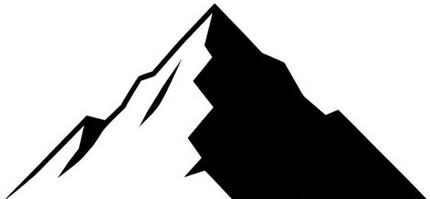

In [ ]:
from llama_index.core.schema import ImageNode
import base64
import tempfile
from IPython.display import Image, display

retriever = index.as_retriever(
    retrieve_page_figure_nodes=True, dense_similarity_top_k=1
)

nodes = retriever.retrieve("Sample query")

image_nodes = [n.node for n in nodes if isinstance(n.node, ImageNode)]

for img_node in image_nodes:
    print(img_node.metadata)
    with tempfile.NamedTemporaryFile(suffix=".jpg") as temp_file:
        temp_file.write(base64.b64decode(img_node.image))
        print(f"Image saved to {temp_file.name}")
        # Display the image in Jupyter Notebook
        display(Image(filename=temp_file.name))